In [24]:
%matplotlib inline
#matplotlib notebook
#matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl
import itertools
#%matplotlib notebook

In [257]:
def generate_equations_multi (F_tr,n):
    '''
    powers= list(itertools.product(list(range(1,n+1)), repeat=4))
    #print (powers)

    x_sum = np.array([])
    for i in range (0,n+1):
            for j in range (0,n+1):
                for i in powers:
                    p = list (i)
                    #print (p)
                    temp_V = V**p[0]

                    temp_AT = AT**p[1]
                    temp_AP = AP**p[2]
                    temp_RH = RH**p[3]
                    temp_term = temp_V * temp_AT * temp_AP * temp_RH
            x_sum= np.append(x_sum,temp_term)
    return x_sum
    '''
    
    tt= []
    N = F_tr.shape[0]
    T = list (range(len(F_tr[0,:])))
    
    for i in range (2,n+1):
        for j in itertools.combinations_with_replacement(T,i):
            tt.append(list(j))
    x_sum = F_tr.copy()
    
    for t in tt:
        z=np.ones((N,1))
        
        for j in t:
            z *= F_tr[:,j].reshape(-1,1)
        x_sum=np.append(x_sum,z,axis=1)
    return x_sum
        
            

            
            
    

In [203]:
b =np.array([1,2])
z = generate_equations_multi (b,b,b,b,2)
print(z.shape)

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 2, 0), (0, 0, 2, 1), (0, 0, 2, 2), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 0, 2), (0, 1, 1, 0), (0, 1, 1, 1), (0, 1, 1, 2), (0, 1, 2, 0), (0, 1, 2, 1), (0, 1, 2, 2), (0, 2, 0, 0), (0, 2, 0, 1), (0, 2, 0, 2), (0, 2, 1, 0), (0, 2, 1, 1), (0, 2, 1, 2), (0, 2, 2, 0), (0, 2, 2, 1), (0, 2, 2, 2), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 0, 2), (1, 0, 1, 0), (1, 0, 1, 1), (1, 0, 1, 2), (1, 0, 2, 0), (1, 0, 2, 1), (1, 0, 2, 2), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 0, 2), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 0), (1, 1, 2, 1), (1, 1, 2, 2), (1, 2, 0, 0), (1, 2, 0, 1), (1, 2, 0, 2), (1, 2, 1, 0), (1, 2, 1, 1), (1, 2, 1, 2), (1, 2, 2, 0), (1, 2, 2, 1), (1, 2, 2, 2), (2, 0, 0, 0), (2, 0, 0, 1), (2, 0, 0, 2), (2, 0, 1, 0), (2, 0, 1, 1), (2, 0, 1, 2), (2, 0, 2, 0), (2, 0, 2, 1), (2, 0, 2, 2), (2, 1, 0, 0), (2, 1, 0, 1), (2, 1, 0, 2), (2, 1, 1, 0), (2, 1, 1, 1), (2, 1, 1, 2), (2, 1, 2, 0), (2, 1, 2, 1), (2, 1

In [193]:
 def generate_equations (X,Y,n):
        x_sum = np.array([])
        xy= np.array([])
        for i in range (0,n+1):
            for j in range (0,n+1):
                temp_x = np.sum(X**(i+j))  # generating the elements of the x^i matrix 
                x_sum= np.append(x_sum,temp_x)
            temp_y=np.sum(Y*(X**i)) # generating the elements of the x^i y matrix 
            xy=np.append(xy,temp_y)
        return x_sum, xy

In [27]:
#solving the system of equations and finding the weights
def find_w (x_sum,xy,n):
    x_sum = np.reshape(x_sum, (( n + 1), (n + 1))) # adjust the dimensions to be solveable
    xy = np.reshape(xy, ((n + 1), 1))
    #print(x_sum, '\n\n', xy)
    x_sum_inverse = np.linalg.inv(x_sum)
    w = np.matmul(x_sum_inverse,xy).ravel()
    #w = np.flip(w) #no need to flip
    return w
    #w=np.polyfit(V,P,1)
    #print(w)
    #print(w_os)

In [28]:
def find_w_multi (X,t):
    X=np.c_[X,np.ones(X.shape[0])]
    X_T = np.transpose(X)
    XT_X = np.matmul(X_T,X)
    XT_X_inv = np.linalg.inv(XT_X)
    w= np.linalg.multi_dot([XT_X_inv,X_T,t])
    return w

In [92]:
class LeastSquare(object):
    #http://cs231n.github.io/classification/
    def __init__(self):
        pass
    
    def polynomial_fit (self,X,Y,n):
        x_sum, xy =generate_equations (X,Y,n)
        w= find_w (x_sum,xy,n)
        return w
    
    def generate_model (self,X,W):
        f = 0
        for i in range (0,np.size(W)):
            f += (W[i]*(X**i))
        return f
    
    def generate_model_multi (self,X,W):
        #W_t = np.transpose(W)
        f = np.dot(X,W)
        return f
    
    def calculate_rms_err (self,y,fn):
        return math.sqrt(np.sum((y-fn)**2)/y.size)
    
        

In [30]:
# Use numpy to load the data
fold_1 = np.loadtxt('C:/Users/Mohammed/CCPP/fold1.txt')
fold_2 = np.loadtxt('C:/Users/Mohammed/CCPP/fold2.txt')
fold_3 = np.loadtxt('C:/Users/Mohammed/CCPP/fold3.txt')
fold_4 = np.loadtxt('C:/Users/Mohammed/CCPP/fold4.txt')
fold_5 = np.loadtxt('C:/Users/Mohammed/CCPP/fold5.txt')
print(fold_1.shape)
print(fold_2.shape)
print(fold_3.shape)
print(fold_4.shape)
print(fold_5.shape)


(9568, 5)
(9568, 5)
(9568, 5)
(9568, 5)
(9568, 5)


In [31]:
def generate_validation_fold (fold_1,fold_2,fold_3,fold_4,fold_5,n):
    training_folds = []
    if (n==1):
        training_folds.extend(fold_2)
        training_folds.extend(fold_3)
        training_folds.extend(fold_4)
        training_folds.extend(fold_5)
        validation_fold = fold_1
    if (n==2):
        training_folds.extend(fold_1)
        training_folds.extend(fold_3)
        training_folds.extend(fold_4)
        training_folds.extend(fold_5)
        validation_fold = fold_2
    if (n==3):
        training_folds.extend(fold_1)
        training_folds.extend(fold_2)
        training_folds.extend(fold_4)
        training_folds.extend(fold_5)
        validation_fold = fold_3
    if (n==4):
        training_folds.extend(fold_1)
        training_folds.extend(fold_2)
        training_folds.extend(fold_3)
        training_folds.extend(fold_5)
        validation_fold = fold_4
    if (n==5):
        training_folds.extend(fold_1)
        training_folds.extend(fold_2)
        training_folds.extend(fold_3)
        training_folds.extend(fold_4)
        validation_fold = fold_5
    
    training_folds=np.array(training_folds)
    
    return training_folds, validation_fold

In [32]:
training_folds ,validation_fold = generate_validation_fold(fold_1,fold_2,fold_3,fold_4,fold_5,5)
#training_folds_norm = training_folds / training_folds.max(axis=0)
V = training_folds[:,1]
P = training_folds[:,4]
AT =training_folds[:,0]
AP =training_folds[:,2]
RH= training_folds[:,3]

print (V)
print (P)
#print (validation_fold[0])
#print (training_folds_norm[0])
#print (training_folds.shape)
#print (validation_fold.shape)

[41.76 62.96 39.4  ... 41.31 43.52 48.6 ]
[463.26 444.37 488.56 ... 489.86 458.57 460.63]


In [130]:
x=list(range(0,4))
combination = []
for L in range(0, len(x)+1):
    for subset in itertools.combinations(x, L):
        combination.append(list(subset))
        #print(list(subset))
        
features_comb=[]
for i in range (1,len(combination)):
    #print(combination[i])
    features_comb.append( training_folds[:,combination[i]])
    
    
ws= find_w_multi (training_folds[:,combination[5]],P)
print(combination[12])
print(ws)
    #print(features_comb[i-1].shape)
#features_comb = np.array(features_comb)

[0, 1, 3]
[-1.70426591e+00 -3.24486516e-01  5.05477434e+02]


In [192]:
n = 9
LS = LeastSquare()
x_sum, xy = generate_equations (V,P,n)

(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)
(38272,)


In [70]:
print (x_sum)

[3.82720000e+04 2.07839172e+06 1.19048653e+08 7.15183119e+09
 4.47153890e+11 2.88643909e+13 1.91002792e+15 1.28824986e+17
 8.81785058e+18 6.10600638e+20 2.07839172e+06 1.19048653e+08
 7.15183119e+09 4.47153890e+11 2.88643909e+13 1.91002792e+15
 1.28824986e+17 8.81785058e+18 6.10600638e+20 4.26778476e+22
 1.19048653e+08 7.15183119e+09 4.47153890e+11 2.88643909e+13
 1.91002792e+15 1.28824986e+17 8.81785058e+18 6.10600638e+20
 4.26778476e+22 3.00606375e+24 7.15183119e+09 4.47153890e+11
 2.88643909e+13 1.91002792e+15 1.28824986e+17 8.81785058e+18
 6.10600638e+20 4.26778476e+22 3.00606375e+24 2.13128007e+26
 4.47153890e+11 2.88643909e+13 1.91002792e+15 1.28824986e+17
 8.81785058e+18 6.10600638e+20 4.26778476e+22 3.00606375e+24
 2.13128007e+26 1.51971214e+28 2.88643909e+13 1.91002792e+15
 1.28824986e+17 8.81785058e+18 6.10600638e+20 4.26778476e+22
 3.00606375e+24 2.13128007e+26 1.51971214e+28 1.08914486e+30
 1.91002792e+15 1.28824986e+17 8.81785058e+18 6.10600638e+20
 4.26778476e+22 3.006063

In [71]:

n = 3
w= LS.polynomial_fit (V,P,n)
#w_p = np.polyfit(V,P,n)
print(w)
#print(w_p)

[ 5.54146849e+02 -2.14437732e+00 -2.71228491e-03  1.34357110e-04]


In [72]:
y_pred = LS.generate_model(V,w)
#y_pred = LS.generate_model(np.array([38.56]),w)
#z = LS.generate_model(np.array([2]),np.array([1,2]))
#print(z)
#print(y_pred.shape)
print(y_pred)

[469.65228346 441.91710087 473.66562172 ... 470.40572702 466.76108765
 458.94682412]


In [73]:
err = LS.calculate_rms_err(P,y_pred)
print(P)
print(y_pred)
print(err)

[463.26 444.37 488.56 ... 489.86 458.57 460.63]
[469.65228346 441.91710087 473.66562172 ... 470.40572702 466.76108765
 458.94682412]
8.094768116235457


In [127]:
#finding the best polynomial order using V only as input
training_errors = []
validation_errors = []
for k in range (1,16):
    k_training_errors = []
    k_validation_errors=[]
    for i in range (1,6):
        training_folds ,validation_fold = generate_validation_fold(fold_1,fold_2,fold_3,fold_4,fold_5,i)
        V_tr = training_folds[:,1]
        P_tr = training_folds[:,4]
        V_valid=validation_fold[:,1]
        P_valid=validation_fold[:,4]
        x_sum_tr, xy_tr = generate_equations (V_tr,P_tr,k)
        x_sum_valid, xy_valid = generate_equations (V_valid,P_valid,k)
        w_tr = LS.polynomial_fit (V_tr,P_tr,k)
        w_valid= LS.polynomial_fit (V_valid,P_valid,k)
        #w_tr = np.polyfit (V_tr,P_tr,k).ravel()
        #w_tr=np.flip(w_tr)
        #w_valid= np.polyfit (V_valid,P_valid,k).ravel()
        #w_valid=np.flip(w_valid)
        V_tr_pred = LS.generate_model(V_tr,w_tr)
        V_valid_pred = LS.generate_model(V_valid,w_valid)
        err_tr = LS.calculate_rms_err(P_tr,V_tr_pred)
        err_valid = LS.calculate_rms_err(P_valid,V_valid_pred)
        k_training_errors.append(err_tr)
        k_validation_errors.append(err_valid)

    training_errors.append(k_training_errors) 
    validation_errors.append(k_validation_errors)
        
        
        
        
    

In [75]:
print(training_errors)

[[8.421083720649516, 8.421083720649516, 8.421083720649516, 8.421083720649515, 8.421083720649515], [8.09733822412009, 8.09733822412009, 8.09733822412009, 8.09733822412009, 8.097338224120092], [8.094768116235457, 8.094768116235455, 8.094768116235457, 8.094768116235455, 8.094768116235457], [8.01017883799101, 8.010178837991013, 8.010178837991013, 8.01017883799103, 8.010178837991013], [7.8629039525344835, 7.862903952529804, 7.862903952529804, 7.862903952575347, 7.862903952682717], [7.8493250689070635, 7.849325100786577, 7.849325100786577, 7.849325032664446, 7.849325206024414], [7.748330457319411, 7.749367057172404, 7.754372972421681, 7.751843672407993, 7.752541053933194], [44.08959839035945, 20.741648784854725, 21.67422679679524, 10.970603360105478, 10.7403022697639], [761.3427029490755, 693.3181301289344, 396.5449031358081, 335.4071450492376, 9901.391210368965], [844.8121404111678, 801.238358372037, 313.14784099568953, 265.33285242601784, 344.1622727006076], [241.99901547997192, 114.398425

In [76]:
print(validation_errors)

[[8.421083720649515, 8.421083720649515, 8.421083720649515, 8.421083720649515, 8.421083720649515], [8.097338224120092, 8.09733822412009, 8.09733822412009, 8.097338224120092, 8.097338224120092], [8.094768116235457, 8.094768116235453, 8.094768116235455, 8.094768116235455, 8.094768116235453], [8.010178837991022, 8.010178837991013, 8.010178837991011, 8.010178837991008, 8.010178837991017], [7.862903952528831, 7.862903952528315, 7.862903952525377, 7.862903952533244, 7.862903952562892], [7.849325123527054, 7.849325265160451, 7.8493252404251255, 7.849325125228186, 7.84932503795399], [7.748186839632267, 7.750535900894489, 7.7487693090677, 7.748797238671432, 7.752906640904721], [12.76654285003288, 17.40772823653757, 14.611109565812644, 21.47490194582561, 18.379638380759776], [1135.4224785218194, 14.918064944235965, 261.48927600956813, 62.82083830742612, 253.65175873490162], [1460.0819140614237, 173.3384084432263, 501.8674967286195, 5942.736316290021, 116.16145182178681], [285.9652232576499, 394.2

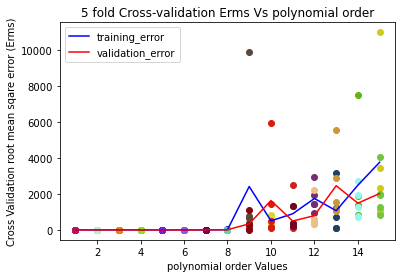

In [128]:
avg_train_error=np.average(training_errors,axis=1)
avg_validation_error=np.average(validation_errors,axis=1)

x = list(range(1,16))
#print (x)
y_tr = training_errors
y_valid = validation_errors
#print(y)
training_errors_dict = dict(zip(x,y_tr))
validation_errors_dict = dict(zip(x,y_valid))
#print(accuracies_dict[1])

plt.plot(x , avg_train_error , 'b', alpha = 1)
pl.plot(x , avg_validation_error , 'r', alpha = 1)

for k in training_errors_dict:
    #print(k)
    c = np.random.random_sample(3)
    for i in training_errors_dict[k]:
        #print("i"+ str(i))
        plt.scatter(k , i , color = c , alpha = 1)
        
for k in validation_errors_dict:
    #print(k)
    c = np.random.random_sample(3)
    for i in validation_errors_dict[k]:
        #print("i"+ str(i))
        plt.scatter(k , i , color = c , alpha = 1)
     

plt.title("5 fold Cross-validation Erms Vs polynomial order")
plt.xlabel("polynomial order Values")
plt.ylabel("Cross Validation root mean sqare error (Erms)")
plt.legend(['training_error', 'validation_error'])
#plt.figure()
plt.show()

In [129]:
#finding the best combination of the 4 features
training_errors = []
validation_errors = []
for k in range (1,len(combination)):
    k_training_errors = []
    k_validation_errors=[]
    for i in range (1,6):
        training_folds ,validation_fold = generate_validation_fold(fold_1,fold_2,fold_3,fold_4,fold_5,i)
        #V_tr = training_folds[:,1]
        F_tr = training_folds[:,combination[k]] #combinations mix
        
        P_tr = training_folds[:,4]
        #V_valid=validation_fold[:,1]
        F_valid = validation_fold[:,combination[k]]
        P_valid=validation_fold[:,4]
        #x_sum_tr, xy_tr = generate_equations (V_tr,P_tr,k)
        #x_sum_valid, xy_valid = generate_equations (V_valid,P_valid,k)
        #w_tr = LS.polynomial_fit (V_tr,P_tr,k)
        #w_valid= LS.polynomial_fit (V_valid,P_valid,k)
        w_tr= find_w_multi (F_tr,P_tr)
        w_valid = find_w_multi (F_valid,P_valid)
        
        #w_tr = np.polyfit (V_tr,P_tr,k).ravel()
        #w_tr=np.flip(w_tr)
        #w_valid= np.polyfit (V_valid,P_valid,k).ravel()
        #w_valid=np.flip(w_valid) 
        F_tr=np.c_[F_tr,np.ones(F_tr.shape[0])] 
        F_valid=np.c_[F_valid,np.ones(F_valid.shape[0])] 
        F_tr_pred = LS.generate_model_multi(F_tr,w_tr)
        #print(F_tr)
        #print(w_tr)
        F_valid_pred = LS.generate_model_multi(F_valid,w_valid)
        #print(F_tr_pred.shape)
        #print(F_valid_pred.shape)
        #print(P_tr)
        #print(F_tr_pred)
        err_tr = LS.calculate_rms_err(P_tr,F_tr_pred)
        err_valid = LS.calculate_rms_err(P_valid,F_valid_pred)
        #print(P_valid)
        #print(F_valid_pred)
        k_training_errors.append(err_tr)
        k_validation_errors.append(err_valid)

    training_errors.append(k_training_errors) 
    validation_errors.append(k_validation_errors)

In [124]:
print((training_errors))

[[5.4250992627871355, 5.4250992627871355, 5.4250992627871355, 5.4250992627871355, 5.4250992627871355], [8.421083720649515, 8.421083720649513, 8.421083720649515, 8.421083720649516, 8.421083720649515], [14.593577348721812, 14.593577348721812, 14.59357734872181, 14.593577348721812, 14.593577348721814], [15.716209087848236, 15.716209087848236, 15.716209087848236, 15.716209087848236, 15.716209087848236], [4.954185932035631, 4.954185932035632, 4.954185932035631, 4.954185932035631, 4.954185932035631], [5.37481121652004, 5.37481121652004, 5.374811216520041, 5.374811216520041, 5.37481121652004], [4.7983352404368445, 4.7983352404368445, 4.7983352404368445, 4.7983352404368445, 4.798335240436844], [7.877703527587314, 7.8777035275873155, 7.877703527587315, 7.877703527587314, 7.877703527587314], [8.148713632162984, 8.148713632162984, 8.148713632162984, 8.148713632162984, 8.148713632162984], [13.39146431623522, 13.39146431623522, 13.39146431623522, 13.39146431623522, 13.391464316235218], [4.887719834

In [125]:
print(validation_errors)

[[5.4250992627871355, 5.4250992627871355, 5.4250992627871355, 5.4250992627871355, 5.4250992627871355], [8.421083720649515, 8.421083720649515, 8.421083720649516, 8.421083720649515, 8.421083720649516], [14.593577348721812, 14.593577348721812, 14.593577348721812, 14.593577348721814, 14.593577348721812], [15.716209087848238, 15.716209087848238, 15.716209087848238, 15.716209087848236, 15.716209087848238], [4.954185932035631, 4.954185932035631, 4.954185932035631, 4.954185932035631, 4.954185932035632], [5.374811216520041, 5.37481121652004, 5.37481121652004, 5.374811216520041, 5.374811216520042], [4.7983352404368445, 4.7983352404368445, 4.7983352404368445, 4.798335240436844, 4.798335240436844], [7.877703527587313, 7.877703527587314, 7.877703527587315, 7.877703527587314, 7.877703527587314], [8.148713632162984, 8.148713632162984, 8.148713632162984, 8.148713632162984, 8.148713632162984], [13.39146431623522, 13.39146431623522, 13.39146431623522, 13.39146431623522, 13.39146431623522], [4.8877198348

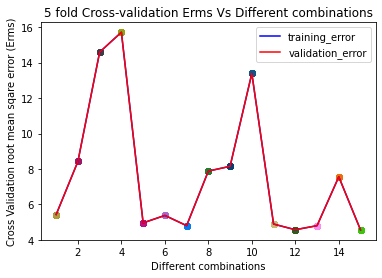

In [135]:
avg_train_error=np.average(training_errors,axis=1)
avg_validation_error=np.average(validation_errors,axis=1)

x = list(range (1,len(combination)))
#print (x)
y_tr = training_errors
y_valid = validation_errors
#print(y)
training_errors_dict = dict(zip(x,y_tr))
validation_errors_dict = dict(zip(x,y_valid))
#print(accuracies_dict[1])

plt.plot(x , avg_train_error , 'b', alpha = 1)
plt.plot(x , avg_validation_error , 'r', alpha = 1)

for k in training_errors_dict:
    #print(k)
    c = np.random.random_sample(3)
    for i in training_errors_dict[k]:
        #print("i"+ str(i))
        plt.scatter(k , i , color = c , alpha = 1)
        
for k in validation_errors_dict:
    #print(k)
    c = np.random.random_sample(3)
    for i in validation_errors_dict[k]:
        #print("i"+ str(i))
        plt.scatter(k , i , color = c , alpha = 1)
     

plt.title("5 fold Cross-validation Erms Vs Different combinations")
plt.xlabel("Different combinations")
plt.ylabel("Cross Validation root mean sqare error (Erms)")
plt.legend(['training_error', 'validation_error'])
#plt.figure()
plt.show()

In [140]:
print(avg_train_error.shape)
print(np.argmin(avg_train_error))
print(avg_train_error[6])
print(avg_train_error[12])
print(avg_train_error[14])

(15,)
14
4.7983352404368445
4.796682293961293
4.557126016749484


In [259]:
#inputting the 4 features and finding the best polynomial [approximation]
training_errors = []
validation_errors = []
for k in range (1,11): #trying polynomial from 1 to 10 
    k_training_errors = []
    k_validation_errors=[]
    for i in range (1,6):
        training_folds ,validation_fold = generate_validation_fold(fold_1,fold_2,fold_3,fold_4,fold_5,i)
        A = training_folds[:,combination[14]] #all 4 inputs 
        B=validation_fold[:,combination[14]]

        F_tr = generate_equations_multi (A,k)
        F_valid = generate_equations_multi (B,k)
        P_tr = training_folds[:,4]
        P_valid = validation_fold[:,4]
        
        
        
        #print(F_tr.shape)
        
        #print(P_tr.shape)
        #print(F_tr.shape)
        #print(F_valid.shape)
        #x_sum_tr, xy_tr = generate_equations (F_tr,P_tr,k)
        #x_sum_valid, xy_valid = generate_equations (F_valid,P_valid,k)
        #print(F_tr.shape)
        w_tr = find_w_multi (F_tr,P_tr)
        
        #print (w_tr)
        w_valid= find_w_multi (F_valid,P_valid)
        F_tr=np.c_[F_tr,np.ones(F_tr.shape[0])] 
        F_valid=np.c_[F_valid,np.ones(F_valid.shape[0])] 
        #w_tr = np.polyfit (V_tr,P_tr,k).ravel()
        #w_tr=np.flip(w_tr)
        #w_valid= np.polyfit (V_valid,P_valid,k).ravel()
        #w_valid=np.flip(w_valid)
        #w_tr= np.transpose(w_tr)
        #w_valid=np.transpose(w_valid)
        F_tr_pred = LS.generate_model_multi(F_tr,w_tr)
        #print(P_tr.shape)
        F_valid_pred = LS.generate_model_multi(F_valid,w_valid)
        err_tr = LS.calculate_rms_err(P_tr,F_tr_pred)
        err_valid = LS.calculate_rms_err(P_valid,F_valid_pred)
        k_training_errors.append(err_tr)
        k_validation_errors.append(err_valid)

    training_errors.append(k_training_errors) 
    validation_errors.append(k_validation_errors)

In [ ]:
'''
V_tr = training_folds[:,1]
AT_tr =training_folds[:,0]
AP_tr =training_folds[:,2]
RH_tr= training_folds[:,3]
P_tr = training_folds[:,4]

#
V_valid =validation_fold[:,1]
AT_valid =validation_fold[:,0]
AP_valid =validation_fold[:,2]
RH_valid= validation_fold[:,3]
P_valid=validation_fold[:,4]
'''        '''
v_sum_tr, vp_tr = generate_equations (V_tr,P_tr,k)
AT_sum_tr, AT_tr = generate_equations (AT_tr,P_tr,k)
AP_sum_tr, AP_tr = generate_equations (AP_tr,P_tr,k)
RH_sum_tr, RH_tr = generate_equations (RH_tr,P_tr,k)

v_sum_valid, vp_valid = generate_equations (V_valid,P_valid,k)
AT_sum_valid, AT_valid = generate_equations (AT_valid,P_valid,k)
AP_sum_valid, AP_valid = generate_equations (AP_valid,P_valid,k)
RH_sum_valid, RH_valid = generate_equations (RH_valid,P_valid,k)
'''

In [260]:
print(training_errors)

[[7.55629211071919, 7.55629211071919, 7.556292110719189, 7.556292110719189, 7.556292110719189], [7.105264963598542, 7.105264956344275, 7.1052649556202505, 7.1052649595657575, 7.105264957986314], [21.346505181444943, 16.632065718375515, 7.041618105736095, 13.344239057353407, 7.208906826003848], [96.49360957259186, 156.37055491142362, 37.29790908330892, 75.54210172988657, 122.15775932667357], [398.56408841801937, 338.67148155296303, 1967.873066617568, 395.7868028942308, 692.2651134120604], [1142.5765385523412, 1273.000044683889, 466.77741571128604, 361.03594328577896, 2237.4844778033344], [22148.762560516556, 1948.3267334939487, 1330.6763685485885, 139276.0639788728, 5024.58080081839], [9780.992649319105, 81147.44927198267, 6881.918096258454, 34301.82843290048, 4289.298996166884], [65967.65247321912, 40530.31888599277, 8305.869853293447, 50205.82667005525, 8235.692098479189], [27690.37961836853, 7926.528848985758, 7889.233035740519, 36373.37687524435, 22162.972886060983]]


In [261]:
print(validation_errors)

[[7.556292110719189, 7.55629211071919, 7.556292110719189, 7.556292110719189, 7.556292110719189], [7.105264956578135, 7.105264966487497, 7.105264955220871, 7.105264960862731, 7.1052649608516525], [13.279727247999931, 11.8405695139544, 10.330268124741915, 9.921916382311315, 10.0442288578675], [124.97099116914451, 169.6167454064608, 209.90465998087106, 199.22938160382932, 683.5046647012763], [1753.81634090182, 1622.9047832134663, 5725.1348273197555, 564.9768288373559, 328.32302349530704], [5250.461546279127, 1514.0500515832148, 2128.2206592395073, 832.8162702215495, 15499.936047744111], [4342.8292139152945, 3582.0962839300782, 3166.487425137296, 24257.52521397767, 10805.059981613858], [15781.264796613814, 30387.778305362157, 23420.467015196304, 11266.378918221766, 6441.160631729819], [16327.08792441992, 10113.051979284344, 10135.776881287708, 15460.676528443824, 31738.335212980826], [129804.48448641444, 3126332.6322011193, 45136.30039697421, 65508.78354195808, 41482.58122248968]]


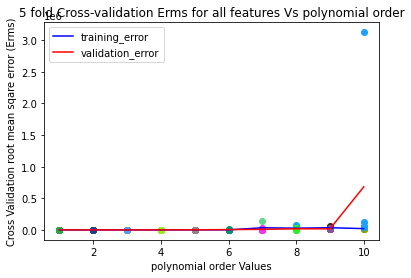

In [262]:
avg_train_error=np.average(training_errors,axis=1)
avg_validation_error=np.average(validation_errors,axis=1)

x = list(range(1,11))
#print (x)
y_tr = training_errors
y_valid = validation_errors
#print(y)
training_errors_dict = dict(zip(x,y_tr))
validation_errors_dict = dict(zip(x,y_valid))
#print(accuracies_dict[1])

plt.plot(x , avg_train_error , 'b', alpha = 1)
pl.plot(x , avg_validation_error , 'r', alpha = 1)

for k in training_errors_dict:
    #print(k)
    c = np.random.random_sample(3)
    for i in training_errors_dict[k]:
        #print("i"+ str(i))
        plt.scatter(k , i , color = c , alpha = 1)
        
for k in validation_errors_dict:
    #print(k)
    c = np.random.random_sample(3)
    for i in validation_errors_dict[k]:
        #print("i"+ str(i))
        plt.scatter(k , i , color = c , alpha = 1)
     

plt.title("5 fold Cross-validation Erms for all features Vs polynomial order")
plt.xlabel("polynomial order Values")
plt.ylabel("Cross Validation root mean sqare error (Erms)")
plt.legend(['training_error', 'validation_error'])
#plt.figure()
plt.show()

In [269]:
print (np.argmin(validation_errors))

7
